## Ryan's ex

# Xarray Oceanography Example
## El Niño / Southern Oscillation (ENSO) from Sea Surface Temperature (SST)

**Author:** [Ryan Abernathey](http://rabernat.github.io)

According to [NOAA](https://www.esrl.noaa.gov/psd/enso/):
>  El Niño and La Niña, together called the El Niño Southern Oscillation (ENSO), are periodic departures from expected sea surface temperatures (SSTs) in the equatorial Pacific Ocean. These warmer or cooler than normal ocean temperatures can affect weather patterns around the world by influencing high and low pressure systems, winds, and precipitation. ENSO may bring much needed moisture to a region while causing extremes of too much or too little water in others.

In this notebook, we use the python [xarray](http://xarray.pydata.org/en/latest/) package to examine SST data from NOAA's [Extended Reconstructed Sea Surface Temperature (ERSST) v5](https://www.ncdc.noaa.gov/data-access/marineocean-data/extended-reconstructed-sea-surface-temperature-ersst-v5) product.
We use [holoviews](http://holoviews.org/) to interactively visualize the data.
We then demonstrate how easy it is to calculate the [Niño3.4 index](https://www.ncdc.noaa.gov/teleconnections/enso/indicators/sst/).
Finally, we use the [EOFS](https://ajdawson.github.io/eofs/index.html) package to compute the Emprical Orthogoal Functions of global SST.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
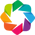

In [1]:
import xarray as xr
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import hvplot.xarray
import holoviews as hv
hv.extension('bokeh')
%matplotlib inline

In [2]:
xr.set_options(display_style='text')

### Access data directly from NOAA using OpenDAP protocal

In [4]:
url = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc'
ds = xr.open_dataset(url)

### Select only the more recent part of the data.

In [5]:
ds = ds.sel(time=slice('1992', '2020'))
ds

<xarray.Dataset>
Dimensions:    (lat: 89, lon: 180, nbnds: 2, time: 340)
Coordinates:
  * lat        (lat) float32 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon        (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time       (time) datetime64[ns] 1992-01-01 1992-02-01 ... 2020-04-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) float64 ...
    sst        (time, lat, lon) float32 ...
Attributes:
    climatology:                     Climatology is based on 1971-2000 SST, X...
    description:                     In situ data: ICOADS2.5 before 2007 and ...
    keywords_vocabulary:             NASA Global Change Master Directory (GCM...
    keywords:                        Earth Science > Oceans > Ocean Temperatu...
    instrument:                      Conventional thermometers
    source_comment:                  SSTs were observed by conventional therm...
    geospatial_lon_min:              -1.0
    geospatial_lon_max:              359.0
    geospatial_laty_max:             89.0
    geospatial_laty_min:             -89.0
    geospatial_lat_max:              89.0
    geospatial_lat_min:              -89.0
    geospatial_lat_units:            degrees_north
    geospatial_lon_units:            degrees_east
    cdm_data_type:                   Grid
    project:                         NOAA Extended Reconstructed Sea Surface ...
    original_publisher_url:          http://www.ncdc.noaa.gov
    References:                      https://www.ncdc.noaa.gov/data-access/ma...
    source:                          In situ data: ICOADS R3.0 before 2015, N...
    title:                           NOAA ERSSTv5 (in situ only)
    history:                         created 07/2017 by PSD data using NCEI's...
    institution:                     This version written at NOAA/ESRL PSD: o...
    citation:                        Huang et al, 2017: Extended Reconstructe...
    platform:                        Ship and Buoy SSTs from ICOADS R3.0 and ...
    standard_name_vocabulary:        CF Standard Name Table (v40, 25 January ...
    processing_level:                NOAA Level 4
    Conventions:                     CF-1.6, ACDD-1.3
    metadata_link:                   :metadata_link = https://doi.org/10.7289...
    creator_name:                    Boyin Huang (original)
    date_created:                    2017-06-30T12:18:00Z (original)
    product_version:                 Version 5
    creator_url_original:            https://www.ncei.noaa.gov
    license:                         No constraints on data access or use
    comment:                         SSTs were observed by conventional therm...
    summary:                         ERSST.v5 is developed based on v4 after ...
    dataset_title:                   NOAA Extended Reconstructed SST V5
    data_modified:                   2020-05-05
    DODS_EXTRA.Unlimited_Dimension:  time

In [6]:
# size of data in MB
ds.nbytes/1e6 

21.796436

In [7]:
# actually download the data
ds.load()

<xarray.Dataset>
Dimensions:    (lat: 89, lon: 180, nbnds: 2, time: 340)
Coordinates:
  * lat        (lat) float32 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon        (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time       (time) datetime64[ns] 1992-01-01 1992-02-01 ... 2020-04-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) float64 9.969e+36 9.969e+36 ... 9.969e+36 9.969e+36
    sst        (time, lat, lon) float32 -1.8 -1.8 -1.8 -1.8 ... nan nan nan nan
Attributes:
    climatology:                     Climatology is based on 1971-2000 SST, X...
    description:                     In situ data: ICOADS2.5 before 2007 and ...
    keywords_vocabulary:             NASA Global Change Master Directory (GCM...
    keywords:                        Earth Science > Oceans > Ocean Temperatu...
    instrument:                      Conventional thermometers
    source_comment:                  SSTs were observed by conventional therm...
    geospatial_lon_min:              -1.0
    geospatial_lon_max:              359.0
    geospatial_laty_max:             89.0
    geospatial_laty_min:             -89.0
    geospatial_lat_max:              89.0
    geospatial_lat_min:              -89.0
    geospatial_lat_units:            degrees_north
    geospatial_lon_units:            degrees_east
    cdm_data_type:                   Grid
    project:                         NOAA Extended Reconstructed Sea Surface ...
    original_publisher_url:          http://www.ncdc.noaa.gov
    References:                      https://www.ncdc.noaa.gov/data-access/ma...
    source:                          In situ data: ICOADS R3.0 before 2015, N...
    title:                           NOAA ERSSTv5 (in situ only)
    history:                         created 07/2017 by PSD data using NCEI's...
    institution:                     This version written at NOAA/ESRL PSD: o...
    citation:                        Huang et al, 2017: Extended Reconstructe...
    platform:                        Ship and Buoy SSTs from ICOADS R3.0 and ...
    standard_name_vocabulary:        CF Standard Name Table (v40, 25 January ...
    processing_level:                NOAA Level 4
    Conventions:                     CF-1.6, ACDD-1.3
    metadata_link:                   :metadata_link = https://doi.org/10.7289...
    creator_name:                    Boyin Huang (original)
    date_created:                    2017-06-30T12:18:00Z (original)
    product_version:                 Version 5
    creator_url_original:            https://www.ncei.noaa.gov
    license:                         No constraints on data access or use
    comment:                         SSTs were observed by conventional therm...
    summary:                         ERSST.v5 is developed based on v4 after ...
    dataset_title:                   NOAA Extended Reconstructed SST V5
    data_modified:                   2020-05-05
    DODS_EXTRA.Unlimited_Dimension:  time

### Calculate Climatology and Monthly Anomaly

Xarray makes this particularly easy

In [8]:
sst_clim = ds.sst.groupby('time.month').mean(dim='time')
sst_anom = ds.sst.groupby('time.month') - sst_clim

/srv/conda/envs/notebook/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Detrend signal

In [15]:
from scipy.signal import detrend

In [14]:
sst_anom_detrended = xr.apply_ufunc(detrend, sst_anom.fillna(0),
                                    kwargs={'axis': 0}).where(~sst_anom.isnull())

NameError: name 'sst_anom' is not defined

### Plot global mean

/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


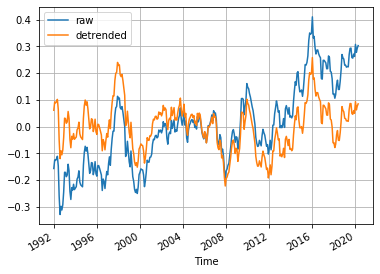

In [10]:
# For a global average, we need to weigh the points by cosine of latitude.
# This is not built into xarray because xarray is not specific to geoscientific data.
weights = np.cos(np.deg2rad(ds.lat)).where(~sst_anom[0].isnull())
weights /= weights.mean()

(sst_anom * weights).mean(dim=['lon', 'lat']).plot(label='raw')
(sst_anom_detrended * weights).mean(dim=['lon', 'lat']).plot(label='detrended')
plt.grid()
plt.legend()

In [11]:
sst_anom_detrended.hvplot('lon', 'lat', cmap='RdBu_r').redim.range(sst=(-2, 2))

:DynamicMap   [time]
   :Image   [lon,lat]   (sst)

### Calculate Oceanic Niño Index

In [12]:
sst_anom_nino34 = sst_anom_detrended.sel(lat=slice(5, -5), lon=slice(190, 240))
sst_anom_nino34_mean = sst_anom_nino34.mean(dim=('lon', 'lat'))
oni = sst_anom_nino34_mean.rolling(time=3, center=True).mean()

Plot it:

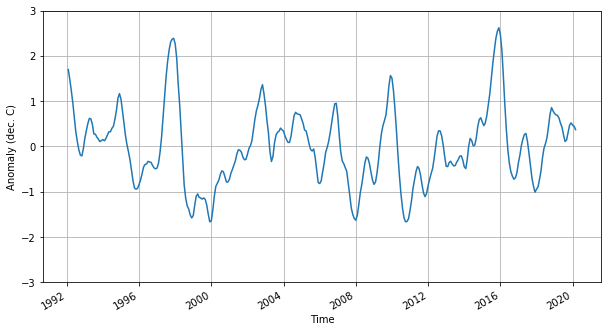

In [13]:
oni.plot(figsize=(10,5))
plt.grid()
plt.ylim(-3,3)
plt.ylabel('Anomaly (dec. C)');

Compare to the [official version](https://www.ncdc.noaa.gov/teleconnections/enso/indicators/sst/) from NOAA:

![NOAA Nino 3.4](https://camo.githubusercontent.com/f4fb57e583e664d9b5f1861d4b062ad0a32aeac1/68747470733a2f2f7777772e6e6364632e6e6f61612e676f762f6d6f6e69746f72696e672d636f6e74656e742f74656c65636f6e6e656374696f6e732f656c6e2d662d70672e676966)

### Composite the global SST on the Niño3.4 index

# SAM Index
Marshall (https://climatedataguide.ucar.edu/climate-data/marshall-southern-annular-mode-sam-index-station-based)

In [14]:
! wget http://www.nerc-bas.ac.uk/public/icd/gjma/newsam.1957.2007.seas.txt

--2020-05-29 00:13:54--  http://www.nerc-bas.ac.uk/public/icd/gjma/newsam.1957.2007.seas.txt
Resolving www.nerc-bas.ac.uk (www.nerc-bas.ac.uk)... 194.66.5.50
Connecting to www.nerc-bas.ac.uk (www.nerc-bas.ac.uk)|194.66.5.50|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2240 (2.2K) [text/plain]
Saving to: ‘newsam.1957.2007.seas.txt.1’

newsam.1957.2007.se 100%[===================>]   2.19K  --.-KB/s    in 0s      

2020-05-29 00:13:54 (99.4 MB/s) - ‘newsam.1957.2007.seas.txt.1’ saved [2240/2240]



In [4]:
! wget http://www.nerc-bas.ac.uk/public/icd/gjma/newsam.1957.2007.txt

--2020-05-31 15:29:06--  http://www.nerc-bas.ac.uk/public/icd/gjma/newsam.1957.2007.txt
Resolving www.nerc-bas.ac.uk (www.nerc-bas.ac.uk)... 194.66.5.50
Connecting to www.nerc-bas.ac.uk (www.nerc-bas.ac.uk)|194.66.5.50|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4957 (4.8K) [text/plain]
Saving to: ‘newsam.1957.2007.txt.1’

newsam.1957.2007.tx 100%[===================>]   4.84K  --.-KB/s    in 0s      

2020-05-31 15:29:07 (265 MB/s) - ‘newsam.1957.2007.txt.1’ saved [4957/4957]



In [3]:
pwd

'/home/jovyan/WMT/Climate-Indices'

In [3]:
ds_sam = pd.read_csv('/home/jovyan/WMT/Climate-Indices/newsam.1957.2007.seas.txt', delim_whitespace=True)

In [5]:
ds_sam_monthly = pd.read_csv('/home/jovyan/WMT/Climate-Indices/newsam.1957.2007.txt', delim_whitespace=True)

In [6]:
ds_sam_monthly

JAN   FEB   MAR   APR   MAY   JUN   JUL   AUG   SEP   OCT   NOV   DEC
1957 -0.87 -2.27  0.07 -1.97 -2.50 -0.87  1.00 -1.73  0.72 -3.12 -5.42 -2.63
1958  0.04 -2.84 -2.52 -0.30 -2.72 -0.97 -1.65  0.97  1.90 -0.16  0.30  0.82
1959  1.59 -0.19 -0.54 -1.25 -0.32 -1.12  0.18 -1.64  2.46 -0.46  3.28 -0.38
1960  0.90  0.85  3.40 -0.35 -0.60 -0.17  0.31  0.43  1.41 -1.17  1.18  1.36
1961  0.91 -4.00 -0.40 -0.14  1.12 -0.40  0.98  1.10 -1.21  1.64  1.52  2.32
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...
2016  3.13  1.35  4.36  1.06 -0.92  3.66  0.81 -1.28  2.46 -0.89 -3.12 -1.52
2017 -1.12 -1.09 -1.56  1.65  1.82  1.98  0.16  0.31  0.42 -0.64  3.18  1.44
2018  2.72  1.02 -0.03 -1.66  0.01 -1.57  0.55 -0.78  1.83  2.76  2.84  1.44
2019  2.79 -1.87  1.47  0.86 -0.11  2.21 -2.20 -2.04  0.81 -1.97 -4.42 -1.78
2020  0.57 -0.36  2.05 -1.72   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN

[64 rows x 12 columns]

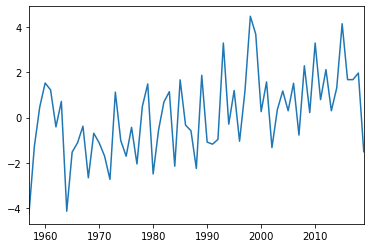

In [5]:
ds_sam.ANN.plot()

In [6]:
sam = xr.Dataset(ds_sam, coords={'time':ds_sam.index.rename('time')})

In [7]:
sam

<xarray.Dataset>
Dimensions:  (dim_0: 63, time: 63)
Coordinates:
  * dim_0    (dim_0) int64 1957 1958 1959 1960 1961 ... 2015 2016 2017 2018 2019
  * time     (time) int64 1957 1958 1959 1960 1961 ... 2015 2016 2017 2018 2019
Data variables:
    ANN      (dim_0) float64 -4.24 -1.27 0.47 1.52 1.22 ... 1.67 1.67 1.96 -1.5
    AUT      (dim_0) float64 -2.52 -2.97 -0.94 0.74 ... 1.64 1.34 -0.81 1.03
    WIN      (dim_0) float64 -0.68 -0.92 -1.22 0.32 ... 1.49 1.15 -0.76 -1.3
    SPR      (dim_0) float64 -3.55 1.42 3.2 1.0 0.85 ... -0.31 1.42 3.92 -2.57
    SUM      (dim_0) float64 -2.52 1.12 0.31 -0.08 ... -1.75 2.33 1.43 -0.96

In [8]:
sam = sam.drop('time')

In [9]:
sam

<xarray.Dataset>
Dimensions:  (dim_0: 63)
Coordinates:
  * dim_0    (dim_0) int64 1957 1958 1959 1960 1961 ... 2015 2016 2017 2018 2019
Data variables:
    ANN      (dim_0) float64 -4.24 -1.27 0.47 1.52 1.22 ... 1.67 1.67 1.96 -1.5
    AUT      (dim_0) float64 -2.52 -2.97 -0.94 0.74 ... 1.64 1.34 -0.81 1.03
    WIN      (dim_0) float64 -0.68 -0.92 -1.22 0.32 ... 1.49 1.15 -0.76 -1.3
    SPR      (dim_0) float64 -3.55 1.42 3.2 1.0 0.85 ... -0.31 1.42 3.92 -2.57
    SUM      (dim_0) float64 -2.52 1.12 0.31 -0.08 ... -1.75 2.33 1.43 -0.96

In [10]:
sam = sam.swap_dims(dims_dict={'dim_0':'time'})

In [11]:
sam['time'] = sam.dim_0.rename('time')

In [12]:
sam

<xarray.Dataset>
Dimensions:  (time: 63)
Coordinates:
    dim_0    (time) int64 1957 1958 1959 1960 1961 ... 2015 2016 2017 2018 2019
  * time     (time) int64 1957 1958 1959 1960 1961 ... 2015 2016 2017 2018 2019
Data variables:
    ANN      (time) float64 -4.24 -1.27 0.47 1.52 1.22 ... 1.67 1.67 1.96 -1.5
    AUT      (time) float64 -2.52 -2.97 -0.94 0.74 0.48 ... 1.64 1.34 -0.81 1.03
    WIN      (time) float64 -0.68 -0.92 -1.22 0.32 0.93 ... 1.49 1.15 -0.76 -1.3
    SPR      (time) float64 -3.55 1.42 3.2 1.0 0.85 ... -0.31 1.42 3.92 -2.57
    SUM      (time) float64 -2.52 1.12 0.31 -0.08 2.19 ... -1.75 2.33 1.43 -0.96

In [16]:
sam_ann_detrended = xr.apply_ufunc(detrend, sam.ANN.fillna(0),
                                    kwargs={'axis': 0}).where(~sam.ANN.isnull())

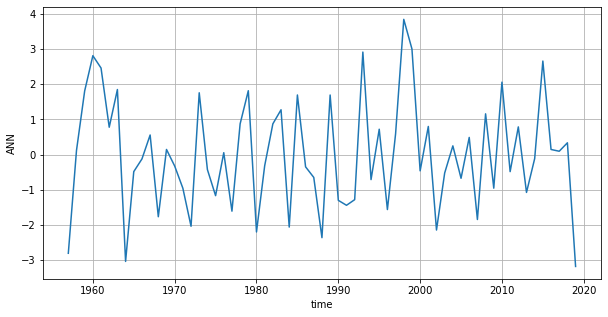

In [17]:
sam_ann_detrended.plot(figsize=(10,5))
plt.grid()

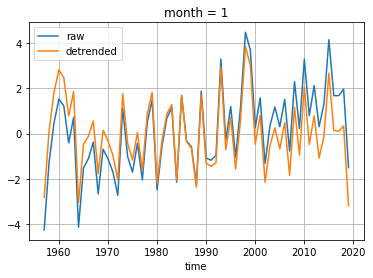

In [27]:
(sam.ANN * weights).mean(dim=['lon', 'lat']).plot(label='raw')
(sam_ann_detrended * weights).mean(dim=['lon', 'lat']).plot(label='detrended')
plt.grid()
plt.legend()

In [18]:
sam_ecco_time = sam_ann_detrended.sel(time=slice(1992, 2015))

In [19]:
sam_ecco_time

<xarray.DataArray 'ANN' (time: 24)>
array([-1.27930364,  2.91047363, -0.7097491 ,  0.72002816, -1.56019457,
        0.58958269,  3.83935996,  2.99913722, -0.46108551,  0.79869176,
       -2.14153098, -0.52175371,  0.24802355, -0.67219918,  0.48757808,
       -1.84264465,  1.15713262, -0.95309012,  2.05668715, -0.48353559,
        0.78624168, -1.07398105, -0.11420379,  2.65557348])
Coordinates:
    dim_0    (time) int64 1992 1993 1994 1995 1996 ... 2011 2012 2013 2014 2015
  * time     (time) int64 1992 1993 1994 1995 1996 ... 2011 2012 2013 2014 2015

In [22]:
pwd

'/home/jovyan/WMT/Climate-Indices'

In [23]:
sam_ecco_time.to_netcdf('/home/jovyan/WMT/Climate-Indices/sam_ecco_time.nc')

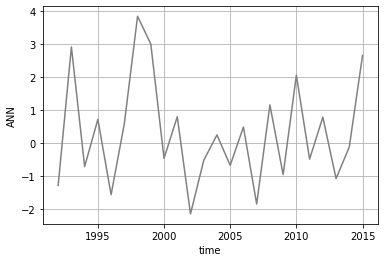

In [21]:
sam_ecco_time.plot(color='grey', label='SAM')
plt.grid()

In [30]:
oni_yearly = oni.groupby('time.year').mean()

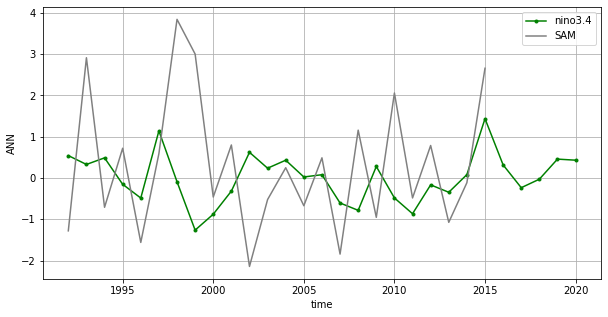

In [31]:
oni_yearly.plot(figsize=(10,5), color='green', marker='.', label='nino3.4')
sam_ecco_time.plot(color='grey', label='SAM')
plt.legend()
plt.grid()
#plt.ylim(-6,6)
#plt.ylabel('Anomaly (dec. C)');

# Windstress Curl from ECCO

In [3]:
import xarray as xr
from matplotlib import pyplot as plt
import gcsfs
import dask
import dask.array as dsa
import numpy as np
import intake
import fsspec
import xmitgcm
from xmitgcm.llcreader.llcmodel import faces_dataset_to_latlon
%matplotlib inline

/srv/conda/envs/notebook/lib/python3.7/site-packages/intake/source/discovery.py:136: FutureWarning: The drivers ['geojson', 'postgis', 'shapefile', 'spatialite'] do not specify entry_points and were only discovered via a package scan. This may break in a future release of intake. The packages should be updated.
  FutureWarning)


In [4]:
xr.set_options(display_style='text')

In [5]:
ds = xr.open_zarr(gcsfs.GCSFileSystem(requester_pays=True).get_mapper('pangeo-ecco-eccov4r3/eccov4r3'))#, consolidated=True)

In [6]:
dt_values = (np.diff(ds.time_snp) / 1e9).astype('f4')
dt = xr.DataArray(dt_values, dims=['time'],
                  coords={'time': (['time'], ds.time.values[1:-1])})
ds.coords['dt'] = dt

In [7]:
ds_ll = faces_dataset_to_latlon(ds)

In [8]:
ds_ll_drop = ds_ll#.drop(['i', 'j', 'i_g', 'j_g']) #, 'k', 'k_u', 'k_l', 'k_p1'])

In [9]:
#WG boundaries (65˚W, 30˚E; 80˚S, 62˚S)
left_lon = 23 #~-64.5˚ #used to be 20
right_lon = 118 #30.5˚ #used to be 115
lower_lat = 30 #~-80˚ #used to be 38
upper_lat = 80 #-61.755745˚ instead of #79:-62.216576˚ to fill upper projection plot row
j_g_upper = 80
i_g_right = 118
i_g_left = 22

In [10]:
#set the boundaries
lat_range = dict(j=slice(lower_lat, upper_lat), j_g=slice(lower_lat, j_g_upper))
lon_range = dict(i=slice(left_lon, right_lon), i_g=slice(left_lon, i_g_right))
lon_rangei_g = dict(i=slice(left_lon, right_lon), i_g=slice(left_lon, i_g_right))

In [11]:
#set the boundaries
lat_range_noface = dict(j=slice(lower_lat, upper_lat))
lon_range_noface = dict(i=slice(left_lon, right_lon))

In [12]:
# a trick to make things work a bit faster
coords = ds_ll_drop.coords.to_dataset().reset_coords().roll(i=50, i_g=50)#(i=100, i_g=100)
ds = ds_ll_drop.reset_coords(drop=True).roll(i=50, i_g=50)#(i=100, i_g=100)
coords_wg = coords.isel(**lat_range, **lon_range)
ds_wg = ds.isel(**lat_range, **lon_range)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
taux = ds_wg.oceTAUX
tauy = ds_wg.oceTAUY

In [14]:
taux_masked = taux.where(taux!=0)
tauy_masked = tauy.where(tauy!=0)

In [15]:
import xgcm
grid = xgcm.Grid(ds_wg, coords={'X': {'center': 'i', 'left': 'i_g'}, 
                             'Y': {'center': 'j', 'left': 'j_g'},
                             'T': {'center': 'time'},
                             'Z': {'center': 'k', 'left': 'k_l', 'outer': 'k_p1', 'right': 'k_u'}},
                             periodic=['X'])
grid

<xgcm.Grid>
X Axis (periodic):
  * center   i --> left
  * left     i_g --> center
Y Axis (not periodic):
  * center   j --> left
  * left     j_g --> center
T Axis (not periodic):
  * center   time
Z Axis (not periodic):
  * center   k --> left
  * left     k_l --> center
  * outer    k_p1 --> center
  * right    k_u --> center

In [71]:
import xgcm
grid_gordon = xgcm.Grid(ds_gordon, coords={'X': {'center': 'i', 'left': 'i_g'}, 
                             'Y': {'center': 'j', 'left': 'j_g'},
                             'T': {'center': 'time'},
                             'Z': {'center': 'k', 'left': 'k_l', 'outer': 'k_p1', 'right': 'k_u'}},
                             periodic=['X'])
grid_gordon

<xgcm.Grid>
X Axis (periodic):
  * center   i --> left
  * left     i_g --> center
Y Axis (not periodic):
  * center   j --> left
  * left     j_g --> center
T Axis (not periodic):
  * center   time
Z Axis (not periodic):
  * center   k --> left
  * left     k_l --> center
  * outer    k_p1 --> center
  * right    k_u --> center

In [67]:
left_lon_gordon = 58
i_g_left_gordon = 58
upper_lat_gordon = 84
lower_lat_gordon = 60
lon_range_gordon = dict(i=slice(left_lon_gordon, right_lon), i_g=slice(left_lon_gordon, i_g_right))
lat_range = dict(j=slice(lower_lat_gordon, upper_lat_gordon), j_g=slice(lower_lat_gordon, upper_lat_gordon))

In [68]:
ds_gordon = ds.isel(**lat_range, **lon_range_gordon)
coords_gordon = coords.isel(**lat_range, **lon_range_gordon)

In [69]:
taux_masked_gordon = ds_gordon.oceTAUX.where(ds_gordon.oceTAUX!=0)
tauy_masked_gordon = ds_gordon.oceTAUY.where(ds_gordon.oceTAUY!=0)

In [74]:
windstress_curl_gordon = (-grid_gordon.diff(taux_masked_gordon * coords_gordon.dxC, 'Y', boundary='extend') 
                         + grid_gordon.diff(tauy_masked_gordon * coords_gordon.dyC, 'X', boundary='extend')) /coords_gordon.rAz

In [75]:
windstress_curl_gordon.load()

<xarray.DataArray (time: 288, j_g: 24, i_g: 60)>
array([[[            nan, -7.75765656e-08, -8.47686650e-08, ...,
                     nan,             nan,             nan],
        [            nan, -1.62553334e-07, -1.57681271e-07, ...,
                     nan,             nan,             nan],
        [ 4.34473662e-07, -1.70502929e-07, -1.59024324e-07, ...,
          6.08992877e-07,  2.92244863e-07, -1.17765522e-08],
        ...,
        [ 8.72479461e-07, -2.36112243e-07, -2.36684400e-07, ...,
         -2.11126277e-07, -1.94377847e-07, -1.76731461e-07],
        [ 8.83825010e-07, -2.22174179e-07, -2.30109933e-07, ...,
         -2.15248932e-07, -2.09241847e-07, -1.93213594e-07],
        [ 8.77147841e-07, -2.25203905e-07, -2.33817730e-07, ...,
         -2.10017362e-07, -2.00683232e-07, -1.83886414e-07]],

       [[            nan,  6.19750367e-08,  6.78221284e-08, ...,
                     nan,             nan,             nan],
        [            nan,  5.48648771e-08,  6.24537719e-08, ...,
                     nan,             nan,             nan],
        [ 3.61544721e-07,  4.23026663e-08,  5.60487869e-08, ...,
          2.46478635e-07,  1.05597792e-07,  6.38446629e-09],
        ...,
        [ 5.59569742e-07, -2.25886382e-07, -2.34238684e-07, ...,
         -1.67146425e-07, -1.68251418e-07, -1.73896083e-07],
        [ 6.55759777e-07, -2.42867742e-07, -2.66077620e-07, ...,
         -1.85560523e-07, -1.95998510e-07, -2.06453805e-07],
        [ 8.04311696e-07, -1.83329718e-07, -2.17690072e-07, ...,
         -2.06491023e-07, -2.20677691e-07, -2.36597543e-07]],

       [[            nan, -2.16067200e-08, -3.79327680e-08, ...,
                     nan,             nan,             nan],
        [            nan, -2.41698814e-07, -2.47797544e-07, ...,
                     nan,             nan,             nan],
        [ 2.26448924e-06, -2.71667545e-07, -2.89078258e-07, ...,
          2.64642551e-07,  3.48636036e-08,  5.13489518e-08],
        ...,
        [ 2.56137128e-06, -4.23275317e-08, -4.53069475e-08, ...,
         -3.26840876e-07, -2.93834916e-07, -2.49015585e-07],
        [ 2.50942276e-06, -9.27144796e-08, -9.59886322e-08, ...,
         -2.71582167e-07, -2.44271831e-07, -2.09165236e-07],
        [ 2.46424588e-06, -1.17553967e-07, -1.21639530e-07, ...,
         -1.92445313e-07, -1.73078064e-07, -1.47586547e-07]],

       ...,

       [[            nan,  2.33698945e-08,  2.60349182e-08, ...,
                     nan,             nan,             nan],
        [            nan, -9.37045002e-08, -8.83807516e-08, ...,
                     nan,             nan,             nan],
        [ 1.31822890e-06, -1.01612208e-07, -1.04740096e-07, ...,
          1.38897803e-06,  1.36456333e-06,  1.21264918e-06],
        ...,
        [ 1.15976707e-06, -3.39363623e-07, -3.50763514e-07, ...,
         -2.09001641e-07, -1.93641853e-07, -1.75766900e-07],
        [ 1.19793344e-06, -3.45992390e-07, -3.68479817e-07, ...,
         -2.48447691e-07, -2.29076520e-07, -2.06856910e-07],
        [ 1.29659884e-06, -3.08458624e-07, -3.04183146e-07, ...,
         -2.92050231e-07, -2.49510890e-07, -2.18244537e-07]],

       [[            nan,  3.81772409e-08,  2.78522148e-08, ...,
                     nan,             nan,             nan],
        [            nan, -2.17146230e-08, -3.33957537e-08, ...,
                     nan,             nan,             nan],
        [ 1.02266620e-06, -8.97836294e-09, -2.10661106e-08, ...,
          9.94475045e-07,  1.00217437e-06,  6.36848767e-07],
        ...,
        [-4.08483231e-07, -1.49404755e-07, -1.80166410e-07, ...,
         -1.16481651e-07, -1.20730576e-07, -1.30967251e-07],
        [-4.00268021e-07, -1.44258706e-07, -1.84814823e-07, ...,
         -1.57215055e-07, -1.35319439e-07, -1.13769708e-07],
        [-4.27972793e-07, -1.26667615e-07, -1.49618430e-07, ...,
         -1.98316926e-07, -1.74423988e-07, -1.60177237e-07]],

       [[            nan,  5.52353789e-08,  5.79103201e-08, ...,
                  

/srv/conda/envs/notebook/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


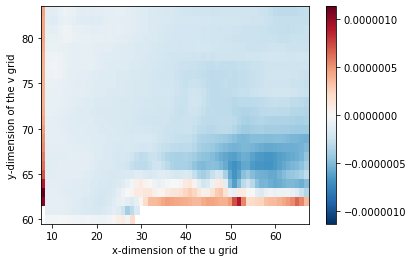

In [76]:
windstress_curl_gordon.mean(dim='time').plot()

In [77]:
windstress_curl_roll_gordon = windstress_curl_gordon.mean(dim=['i_g', 'j_g']).rolling(time=25).mean().load()

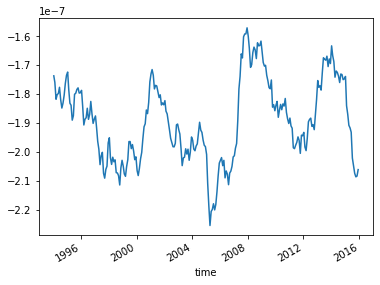

In [78]:
windstress_curl_roll_gordon.plot()

In [38]:
windstress_curl = (-grid.diff(taux_masked * coords_wg.dxC, 'Y', boundary='extend') 
                  + grid.diff(tauy_masked * coords_wg.dyC, 'X', boundary='extend')) /coords_wg.rAz

In [23]:
windstress_curl_roll = windstress_curl.mean(dim=['i_g', 'j_g']).rolling(time=25).mean().load()

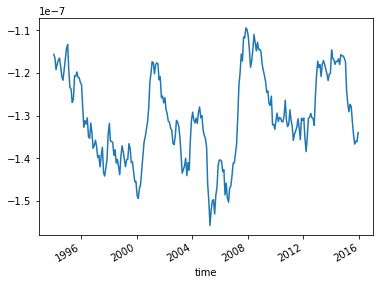

In [24]:
windstress_curl_roll.plot()

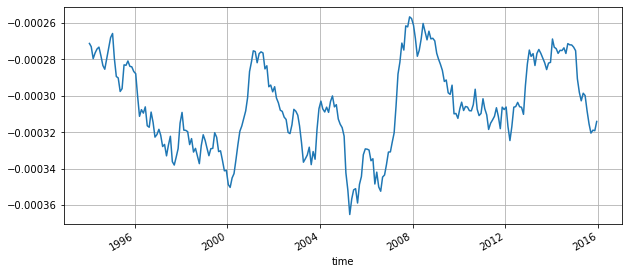

In [71]:
windstress_curl_roll.plot(figsize=(10,4))
plt.grid()

In [ ]:
tauy_masked[0].plot()

In [18]:
taux_masked

<xarray.DataArray 'oceTAUX' (time: 288, j: 50, i_g: 95)>
dask.array<where, shape=(288, 50, 95), dtype=float32, chunksize=(1, 50, 67), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1992-01-15 1992-02-13 ... 2015-12-14
Dimensions without coordinates: j, i_g
Attributes:
    coordinates:    dt iter dxC rAw dyG
    long_name:      zonal surface wind stress, >0 increases uVel
    mate:           oceTAUY
    standard_name:  oceTAUX
    units:          N/m^2

In [17]:
delta_taux = taux_masked.diff(dim='j')
delta_tauy = tauy_masked.diff(dim='i')

In [18]:
delta_x = tauy_masked.i.diff(dim='i')
delta_y = taux_masked.j.diff(dim='j')

In [19]:
curl_taux = - delta_taux / delta_y
curl_tauy = delta_tauy / delta_x

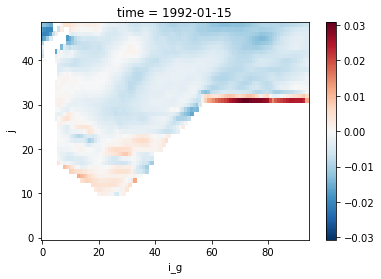

In [23]:
curl_taux[0].plot()

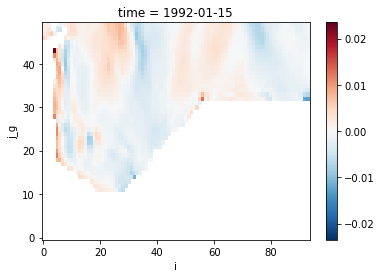

In [24]:
curl_tauy[0].plot()

In [20]:
curl_taux = curl_taux.isel(i_g=slice(0,-1)).chunk({'i_g':-1})

In [32]:
curl_taux

<xarray.DataArray (time: 288, j: 49, i_g: 94)>
dask.array<rechunk-merge, shape=(288, 49, 94), dtype=float64, chunksize=(1, 49, 94), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1992-01-15 1992-02-13 ... 2015-12-14
  * j        (j) int64 31 32 33 34 35 36 37 38 39 ... 71 72 73 74 75 76 77 78 79
  * i_g      (i_g) int64 333 334 335 336 337 338 339 ... 60 61 62 63 64 65 66

In [23]:
curl_tauy = curl_tauy.isel(j_g=slice(0,-1)).chunk({'i':-1})

In [24]:
curl_tauy

<xarray.DataArray (time: 288, j_g: 49, i: 94)>
dask.array<rechunk-merge, shape=(288, 49, 94), dtype=float64, chunksize=(1, 49, 94), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1992-01-15 1992-02-13 ... 2015-12-14
  * i        (i) int64 334 335 336 337 338 339 340 341 ... 61 62 63 64 65 66 67
  * j_g      (j_g) int64 30 31 32 33 34 35 36 37 38 ... 71 72 73 74 75 76 77 78

In [31]:
curl_tauy_new = curl_tauy.expand_dims(dim={'j':curl_taux.j, 'i_g':curl_taux.i_g}).drop(['j_g', 'i'])

In [36]:
curl = curl_taux + curl_tauy_new

In [37]:
curl

<xarray.DataArray (time: 288, j: 49, i_g: 94, j_g: 49, i: 94)>
dask.array<add, shape=(288, 49, 94, 49, 94), dtype=float64, chunksize=(1, 49, 94, 49, 94), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1992-01-15 1992-02-13 ... 2015-12-14
  * j        (j) int64 31 32 33 34 35 36 37 38 39 ... 71 72 73 74 75 76 77 78 79
  * i_g      (i_g) int64 333 334 335 336 337 338 339 ... 60 61 62 63 64 65 66
Dimensions without coordinates: j_g, i

In [ ]:
plt.plot(curl.i_g, curl.j, curl.values)